# REGRESSION PROBLEM TO FIND THE ADMISSON(PERCENTAGE) IN A COLLEGE

## IMPORTING THE PACKAGES

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
#READING THE DATASET USING PANDAS

df=pd.read_csv("Admission_Prediction.csv")

In [3]:
df.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337.0,118.0,4.0,4.5,4.5,9.65,1,0.92
1,2,324.0,107.0,4.0,4.0,4.5,8.87,1,0.76
2,3,NaN,104.0,3.0,3.0,3.5,8.00,1,0.72
3,4,322.0,110.0,3.0,3.5,2.5,8.67,1,0.80
4,5,314.0,103.0,2.0,2.0,3.0,8.21,0,0.65


In [4]:
df.shape

(500, 9)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
Serial No.           500 non-null int64
GRE Score            485 non-null float64
TOEFL Score          490 non-null float64
University Rating    485 non-null float64
SOP                  500 non-null float64
LOR                  500 non-null float64
CGPA                 500 non-null float64
Research             500 non-null int64
Chance of Admit      500 non-null float64
dtypes: float64(7), int64(2)
memory usage: 35.2 KB


# PREPROCESSING THE DATA
     *MISSING VALUES


In [6]:
df.isnull().sum() #TO FIND THE NUMBER OF MISSING OR EMPTY VALUES IN THE DATASET

Serial No.            0
GRE Score            15
TOEFL Score          10
University Rating    15
SOP                   0
LOR                   0
CGPA                  0
Research              0
Chance of Admit       0
dtype: int64

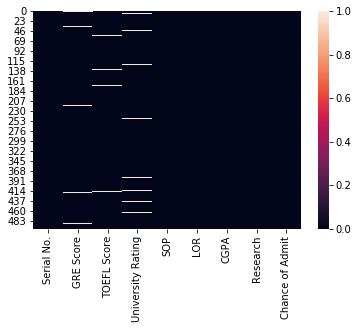

In [7]:
sns.heatmap(df.isnull())#TO FIND THE NUMBER OF MISSING OR EMPTY VALUES IN THE DATASET BUT USING A HEATMAP WHICH IS EASY TO UNDERSTAND

In [8]:
df["GRE Score"].fillna(df["GRE Score"].mode()[0],inplace=True) #REPLACING THE NULL VALUES WITH MODE 

In [9]:
df["TOEFL Score"].fillna(df["TOEFL Score"].mode()[0],inplace=True) #REPLACING THE NULL VALUES WITH MODE 

In [10]:
df['University Rating'].fillna(df['University Rating'].mean(),inplace=True) #REPLACING THE NULL VALUES WITH MEAN 

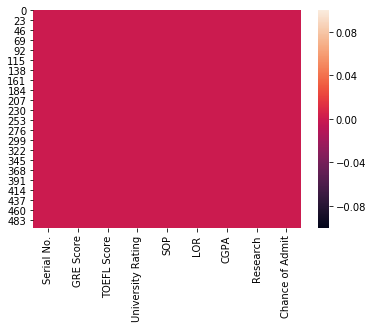

In [11]:
sns.heatmap(df.isnull())

# EXPLORATORY DATA ANALYSIS(EDA)

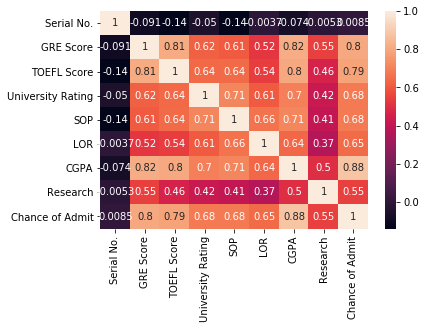

In [12]:
sns.heatmap(df.corr(),annot=True)#TO FIND THE CORRELATION OF VARIABLES USING PEARSON CORRELATION

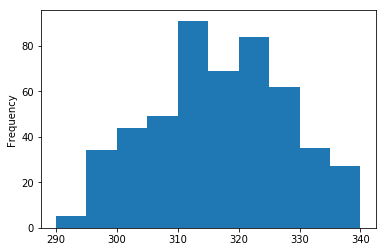

In [13]:
df["GRE Score"].plot(kind="hist")

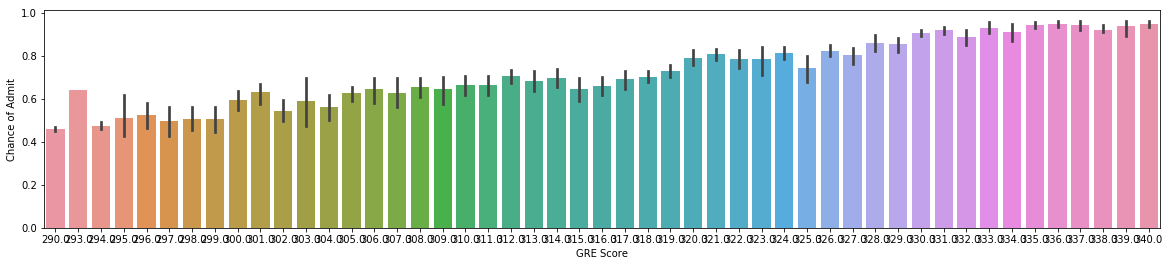

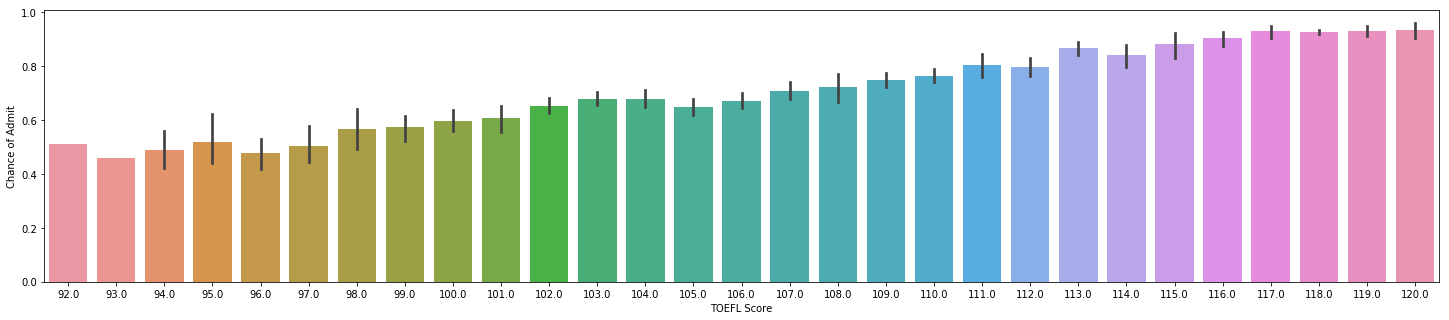

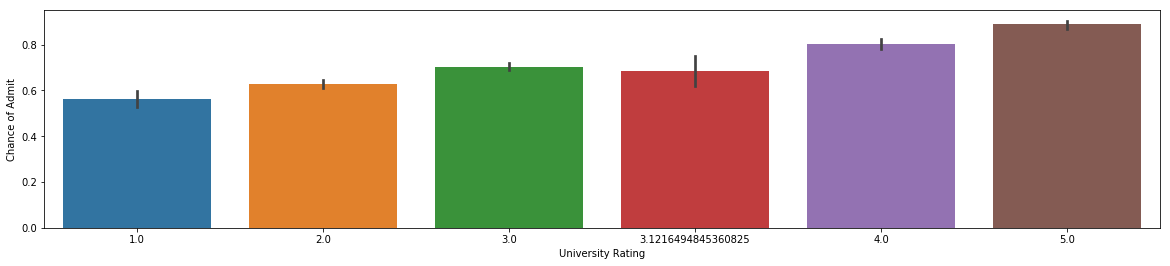

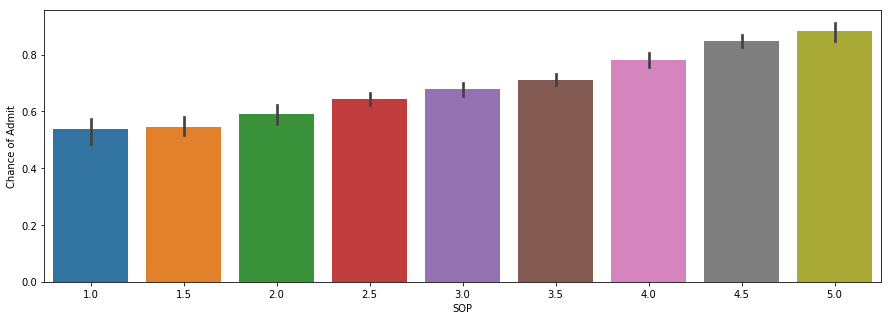

In [14]:
plt.subplots(figsize=(20,4))
sns.barplot(x="GRE Score",y="Chance of Admit",data=df)
plt.subplots(figsize=(25,5))
sns.barplot(x="TOEFL Score",y="Chance of Admit",data=df)
plt.subplots(figsize=(20,4))
sns.barplot(x="University Rating",y="Chance of Admit",data=df)
plt.subplots(figsize=(15,5))
sns.barplot(x="SOP",y="Chance of Admit",data=df)

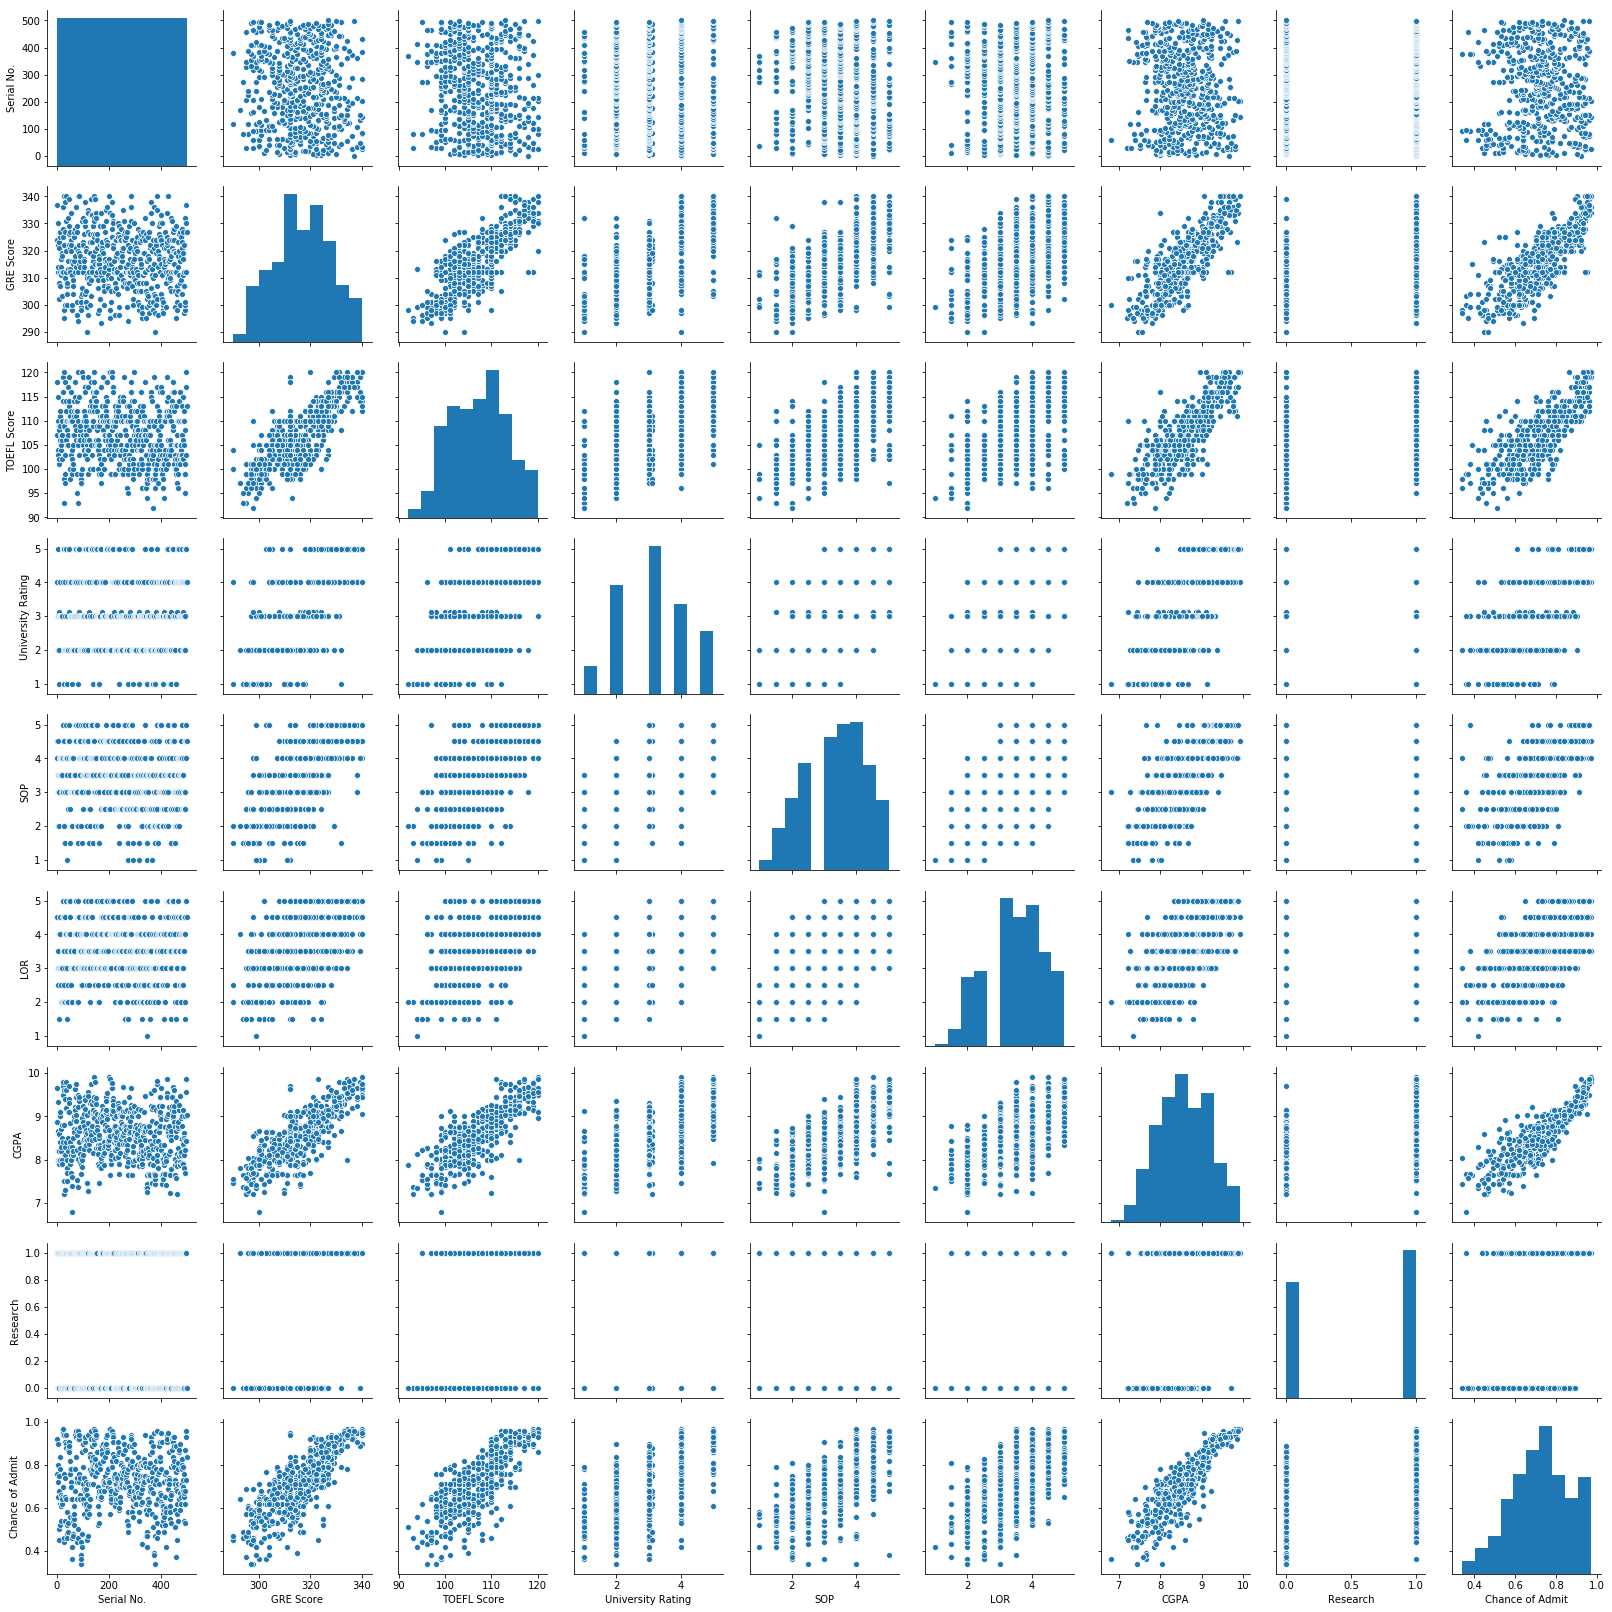

In [16]:
sns.pairplot(df)#PAIRPLOT TO FIND THE RELATION BETWEEN EACH VARIABLES

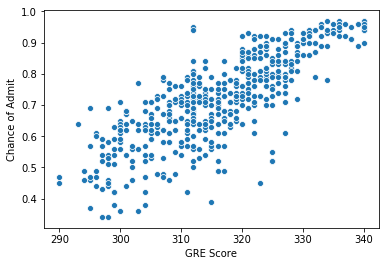

In [17]:
sns.scatterplot(x=df["GRE Score"],y=df["Chance of Admit"])

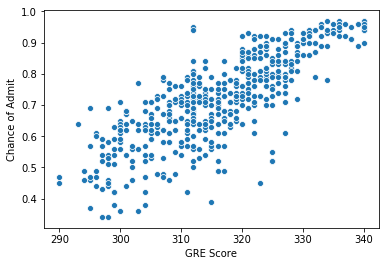

In [18]:
sns.scatterplot(x=df["GRE Score"],y=df["Chance of Admit"])

# SPLITTING THE DEPENDENT AND INDEPENDENT VARIABLES

In [27]:
x=df.drop(['Chance of Admit','Serial No.'],axis=1) 
y=df['Chance of Admit']

In [19]:
x.shape

(500, 7)

# TRAIN TEST SPLIT

In [20]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=50)

# LINEAR REGRESSION

In [21]:
from sklearn.linear_model import LinearRegression

reg=LinearRegression()

reg.fit(X_train,y_train)
y_pred = reg.predict(X_test)

In [22]:
#MODEL EVALUATION
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

MAE: 0.04100383554673922
MSE: 0.003313442137467745
RMSE: 0.05756250635151101


In [23]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.8378240815759974

# DECISION TREE REGRESSOR

In [24]:
from sklearn.tree import DecisionTreeRegressor
dtree=DecisionTreeRegressor(criterion="mse")
reg_dtree=dtree.fit(X_train,y_train)
y_pred_dtree = reg_dtree.predict(X_test)


#MODEL EVALUATION

print('MAE:', metrics.mean_absolute_error(y_test, y_pred_dtree))
print('MSE:', metrics.mean_squared_error(y_test, y_pred_dtree))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred_dtree)))


from sklearn.metrics import r2_score
r2_score(y_test, y_pred_dtree)

MAE: 0.0661
MSE: 0.008820999999999999
RMSE: 0.0939201788754685


0.5682575047133889

# RANDOM FOREST REGRESSOR

In [25]:
from sklearn.ensemble import RandomForestRegressor
rfregressor = RandomForestRegressor(n_estimators = 10, random_state = 0)
rfregressor.fit(X_train,y_train)
y_pred_randomforest = rfregressor.predict(X_test)
#MODEL EVALUATION

print('MAE:', metrics.mean_absolute_error(y_test, y_pred_randomforest))
print('MSE:', metrics.mean_squared_error(y_test, y_pred_randomforest))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred_randomforest)))


from sklearn.metrics import r2_score
r2_score(y_test, y_pred_randomforest)

MAE: 0.04717999999999998
MSE: 0.004515539999999999
RMSE: 0.06719776782006973


0.7789875856290098

In [26]:
a=reg.predict([[300,110,5,5,5,10,1]])
a

array([0.92521606])